## 平面ラプラス分布の可視化，再現

「Geo-indistinguishability: Differential Privacy for Location-Based Systems」より，Figure2の再現を行う．\
確率分布関数に関するグラフの描画を実施する．

In [1]:
# モジュールの導入
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.special import lambertw as LW

### 平面ラプラス分布の3次元描画

In [2]:
# 実際の位置（-2,-4）,(5,3)とする（2点を用意する）
real_xy = [[-2,-4],[5,3]]

# epsilon の値の設定
epsilon = 0.2

# 正規化係数
C = epsilon**2 / (2 * np.pi)

In [3]:
# ユークリッド距離を返す関数の定義
def distance(Noise_x, Noise_y, POI_x, POI_y):
    return np.sqrt( (Noise_x - POI_x)**2 + (Noise_y - POI_y)**2 )

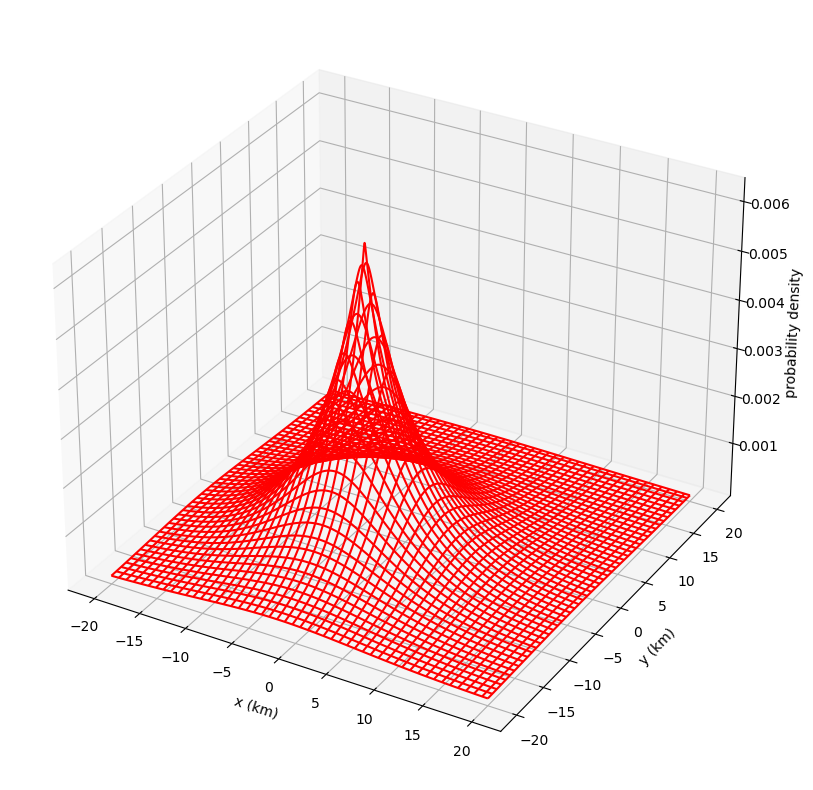

In [4]:
# 確率分布関数の定義と3次元グラフの描画設定
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection="3d")

# 格子点の生成
x = np.linspace(-20, 20, 1024)
y = np.linspace(-20, 20, 1024)

X, Y = np.meshgrid(x, y)

# 各位置ごとの確率密度関数を定義する
pdf_1 = C * np.e**( - epsilon * distance(real_xy[0][0], real_xy[0][1], X, Y) )
#pdf_2 = C * np.e**( - epsilon * distance(real_xy[1][0], real_xy[1][1], X, Y) )

# 2つのグラフを描画する
ax.plot_wireframe(X, Y, pdf_1, color="red")
# ax.plot_wireframe(X, Y, pdf_2, color="red")
ax.set_xlabel("x (km)")
ax.set_ylabel("y (km)")
ax.set_zlabel("probability density")
#plt.title("The pdf of two planar Laplacians, centerd at (-2, -4) and at (5, 3) respectively, with epsilon = 0.2 .")
plt.savefig("pdf_PLMechanism2.png", dpi=120)
plt.show()

### 平面ラプラスノイズを任意の座標に付与する

手法を簡略化して，平面ラプラス分布を離散化して座標の各成分ごとにノイズを付与する．

In [9]:
# 使用する変数の定義

# サンプル数
Num = 10000

# ノイズを付与したs座標の値を格納するためのリストの定義
zx_list = []
zy_list = []

In [10]:
# 平面ラプラスノイズを付与する（ランダムな場合）
# epsilon = 0.2
theta = np.random.uniform(0, 2*np.pi, Num)
p = np.random.uniform(0,1,Num)
W = LW( ((p-1) / np.e), k = -1)
r = ( -1 / epsilon ) * (W + 1)
z_x = real_xy[1][0] + r * np.cos(theta)
z_y = real_xy[1][1] + r * np.sin(theta)

zx_list.append(np.array(z_x))
zy_list.append(np.array(z_y))

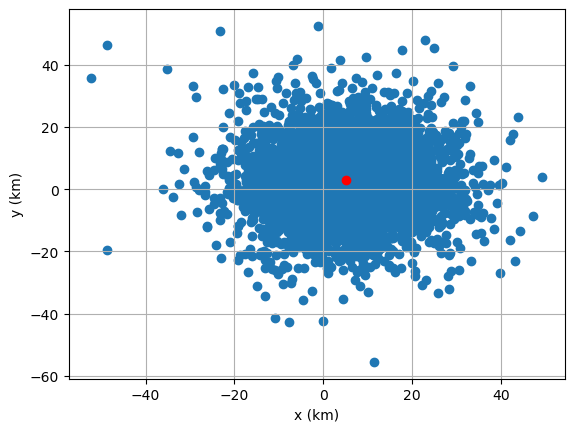

In [12]:
# 散布図として出力する
fig, ax = plt.subplots()
plt.scatter(zx_list, zy_list)

plt.scatter(real_xy[1][0], real_xy[1][1], color="red")
ax.set_xlabel("x (km)")
ax.set_ylabel("y (km)")
plt.grid()
plt.savefig("scatter_PLMechanism.png")
plt.show()

ヒストグラムとして出力するために，縦の重なりを作りたい→小数点第2位を四捨五入して小数点1桁の数にする．

In [13]:
zx_ = np.round(zx_list, decimals=2)
zy_ = np.round(zy_list, decimals=2)

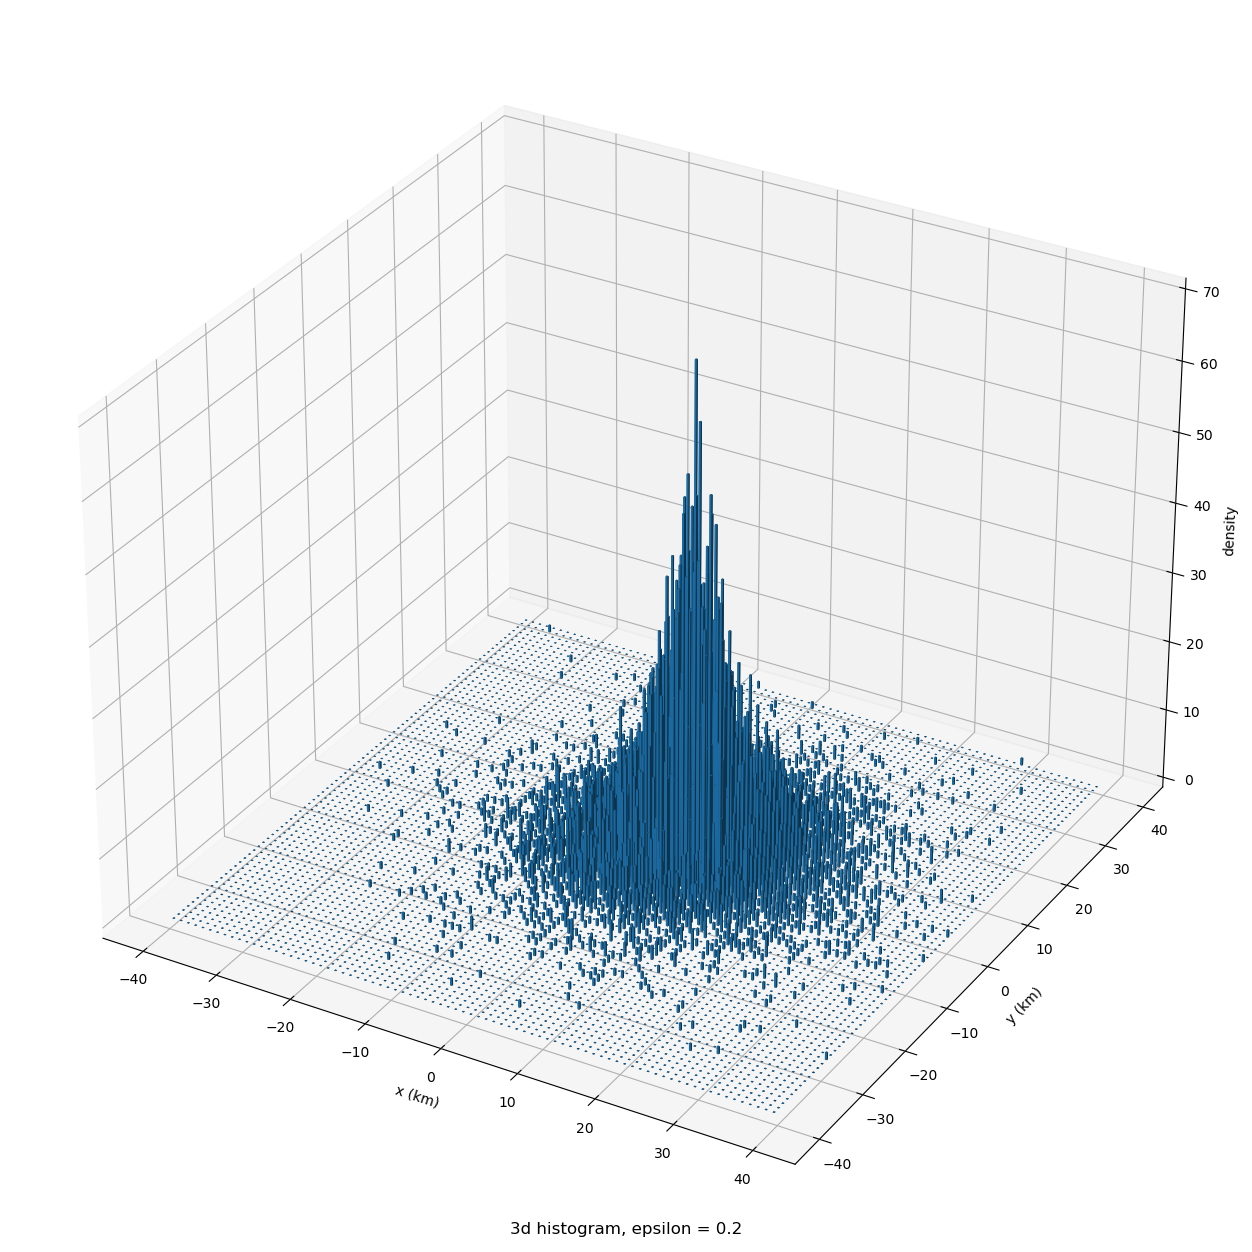

In [22]:
# ヒストグラムとして出力する．
hist, xedges, yedges = np.histogram2d(zx_[0], zy_[0], bins=80, range=[[-40, 40], [-40, 40]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.25
dz = hist.ravel()

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection="3d")
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
plt.title("3d histogram, epsilon = 0.2", y=0)
ax.set_xlabel("x (km)")
ax.set_ylabel("y (km)")
ax.set_zlabel("density")
plt.savefig("3d_histogram_decimals2.png", dpi=120)
plt.show()